<a href="https://colab.research.google.com/github/KordingLab/ENGR344/blob/master/tutorials/W6D1_How_can_we_predict/W6D1_Tutorial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Tutorial 1: Auto Machine Learning using Auto-Sklearn.**

**Week 6: How can we predict?**

- **Content Creators:** Keervani Kandala, Konrad Kording, Tony Liu, Ilenna Jones

- **Content Reviewers:** Rob Lindgren

**Acknowledgements:** This notebook contains excerpts from the official [auto-sklearn](https://automl.github.io/auto-sklearn/master/) tutorials 

In [6]:
# @title Due Dates Calendar

from ipywidgets import widgets
from IPython.display import display, IFrame, YouTubeVideo


out1 = widgets.Output()
with out1:
  calendar = IFrame(src="https://calendar.google.com/calendar/embed?src=356b9d2nspjttvgbb3tvgk2f58%40group.calendar.google.com&ctz=America%2FNew_York", width=600, height=480)
  display(calendar)

out = widgets.Tab([out1])
out.set_title(0, 'Calendar')

display(out)

___
# Part 1 Objectives

*Estimated timing of tutorial: 50 minutes*

This is the tutorial 1 in a 2-part series on how can we make predictions with data. In this tutorial, we will learn about auto machine learning: what is automl, how to use Auto-Sklearn for AutoML with Scikit-Learn machine learning algorithms in Python to make predictions.

By the end of this tutorial, you will know:

- Auto-Sklearn is an open-source library for AutoML with scikit-learn data preparation and machine learning models.
- How to use Auto-Sklearn to automatically discover top-performing models for classification tasks.

In [ ]:
# @title Tutorial slides
 
# @markdown These are the slides for the videos in all tutorials today
from IPython.display import IFrame

IFrame(src=f"https://mfr.ca-1.osf.io/render?url=https://osf.io/9jmpr/?direct%26mode=render%26action=download%26mode=render", width=854, height=480)

---
# Part 1 Setup

This tutorial is divided into 3 sections:
- The concepts behind using AutoML With Auto-Sklearn
- Installing and Using Auto-Sklearn
- Auto-Sklearn for Classification

---
# Section 1: AutoML with Auto-Sklearn

In [ ]:
# @title Video 1: Auto-ML
from ipywidgets import widgets

out1 = widgets.Output()
with out1:
  from IPython.display import YouTubeVideo
  video = YouTubeVideo(id="MUBe2qdb-RY", width=854, height=480, fs=1, rel=0)
  print('Video available at https://youtube.com/watch?v=' + video.id)
  display(video)

out = widgets.Tab([out1])
out.set_title(0, 'Youtube')

display(out)

## **What is Auto ML?**

Machine Learning (ML) algorithms are methods that build or train models to fit to sample data with the purpose of using the models for prediction or decision making. These algorithms usually use optimization techniques to fit the model to data. There are many different approaches to ML. You may have heard of some of them: support vector machines, random forests, logistic regression, etc. Many machine learning courses teach them. We argue that, unless you want to do research in that area, that there is a better solution for getting problems solved.

Automated Machine Learning (Auto ML) provides methods and processes to make Machine Learning automatic. The promise is to allow better results in Machine Learning tasks, to accelerate research on Machine Learning, and to make state of the art machie learning methods available to everyone. Importantly, Auto ML will avoid making the mistakes that many humans make.


Models in machine learning are defined by the model type (e.g. support vector machinem or logistic regression) and their settings that are higher-level parameters (e.g. regularization strength). These parameters are also called  "hyperparameters." Traditionally, models that are effective predictors of the data are found using intuitions, trial, and error - in other words the hyperparameters are hand-tuned. In practice, the choice of algorithm and parameters are hard for humans to guess and hence trial and error usually wins. But why should we let humans do the boring task of trying algorithms until things work?

In contrast, AutoML often involves the use of hyperparameter optimization algorithms, such as Bayesian Optimization, to efficiently navigate the space of possible models and model configurations and quickly discover what works well for a given predictive modeling task. It allows non-expert machine learning practitioners to quickly and easily discover what works well or even best for a given dataset with very little technical background or direct input. There are many platforms available to perform AutoML: Google Cloud AutoML, Amazon, Azure, Auto-SKlearn, and other. We will be using Auto-SKlearn in our tutorial. 

The big advantage of AutoML though is that it avoids leakage. When we try 10 algorithms and deploy the best, we will do better than chance, even if the data is entirely random. But AutoML naturally avoids this problem. As such, the results of AutoML are not just better (because AutoML tries more ideas than Konrad would). They are also more trustworthy (because AutoML does not inappropriately use test set information while humans do.

## **What is Auto-Sklearn?**

Auto-Sklearn is an open-source library for performing AutoML in Python. It makes use of the popular Scikit-Learn machine learning library for data transforms and machine learning algorithms and uses a Bayesian Optimization search procedure to efficiently discover a top-performing model pipeline for a given dataset. 

Auto-Sklearn has won many auto-ML competitions. It includes a lot of cool tricks. But all of these tricks are usually irrelevant from a practitioners perspective. We usually just want good results. And we want that these good results still work on a new dataset. As an example of a cool trick, Auto-Sklearn uses insights from previous ML problems it solved to allow it to basically try good ideas based on the data. E.g. if there are very few data points and the problem is very high dimensional it will use more linear techniques than if things are the other way around.

---
# Section 2: Installing and using Auto-Sklearn


We will start by installing the dependencies for this notebook: the packages swig, numpy and auto-sklearn for our tools, and kaggle for our dataset. This can be achieved using pip, as follows:

In [ ]:
!pip install -q kaggle
!sudo apt-get install swig -y
!pip install Cython numpy
!pip install pipelineprofiler
!pip install auto-sklearn

**After installing the dependencies above, restart runtime (in the runtime menu across the top). This will resolve any issues with conflicting versions of sklearn.**

Incidentally, if you are running not on google colab but on your own computers, you will have to do a lot of this package management yourself. It is not overly interesting. But needs to be done. Stackoverflow is your friend if it does not work.

Now let us import the needed libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import PipelineProfiler
import autosklearn.classification
import sklearn.model_selection

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import sklearn.datasets
import sklearn.metrics

We need to print the auto-sklearn version number to confirm it was installed successfully:
Running the example prints the version number.

In [ ]:
print('autosklearn: %s' % autosklearn.__version__)

What does it mean that autosklearn is 0.14.6? The trailing zero implies that the authors do not quite believe that their library is finished. This is slightly bleeding edge. Anything that is good in ML is generally bleeding edge and not quite stable.

---
# Section 3: Auto-Sklearn with Classification

Using Auto-Sklearn is straightforward.

Depending on whether your prediction task is classification or regression, you create and configure an instance of the `AutoSklearnClassifier` or `AutoSklearnRegressor` class, fit it on your dataset, and that’s it. (Classification = predict something discrete, Regression = predict something continuous) The resulting model can then be used to make predictions directly. 

After installing all the dependencies and libraries, let's try it out!

---
## Preparation of the Data

*Estimated timing to here from start of tutorial: 15 minutes

Now let us load and begin to understand the "Heart Disease Prediction" dataset from Kaggle or from the device as a csv file. 

**URL:** https://www.kaggle.com/cherngs/heart-disease-cleveland-uci

**Description of the dataset:**

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The `target` field refers to the presence of heart disease in the patient. It is a categorical variable, which is integer valued from 0 (no presence) to 1 (presence).

Be sure to read [the dataset description](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)

---
## Loading the Data


Now, let us read the csv file using pandas and print the data.

(One of the tutorial content creators is hosting the csv file from the kaggle website for ease of download into this tutorial - otherwise you would need to log into kaggle.com to access this dataset)


In [ ]:
hearts_url = 'https://raw.githubusercontent.com/roblindgren/datasets/main/heart.csv'
df = pd.read_csv(hearts_url)
df.head()

Given our understanding of the data, we can form a question. Perhaps we are interested in the `target` variable, or presence/absence of heart disease in each patient. For the didactic purpose of this exercise, I remind myself that I can use models via autoML to either predict new datapoints or make decisions. I might then ask the question: "What contributes to heart disease outcome?"

From this I might then say I want to predict heart disease with my model using all of the data I have. I can do this with autoML.

## Coding Exercise 1.1: Convert data into sklearn-compatible format

Now, let us convert the datafile into a numpy array for auto sklearn to use. 

We can also split the dataset into two input and output elements- `X` and `y` (both as numpy arrays), where `y` is the "target" column and `X` contains all the other columns and print their sizes.

In [ ]:
#################################################
## TODO for students: calculate the covariance matrix
# Fill out function and remove
raise NotImplementedError("Student excercise: convert to sklearn-compatible format")
#################################################

# Create X as a numpy array with all columns except column labeled 'target'
X = df.loc[:, df.columns != ...].to_numpy()
print('Shape of X:', X.shape)

# Create y as numpy array using only 'target'
y = df[...].to_numpy()
print('Shape of y:', y.shape)

In [ ]:
### to_remove Solution ###

# Create X as a numpy array with all columns except target
X = df.loc[:, df.columns != 'target'].to_numpy()
print('Shape of X:', X.shape)

# Create y as numpy array using only target
y = df['target'].to_numpy()
print('Shape of y:', y.shape)

Let's also visualize both numpy arrays.

In [ ]:
print(X)
print(y)

As expected, this shows a matrix of values for `X` and a vector of values for `y`. 
- The `X` matrix contains a variety of values with each column corresponding to each variable. 
- The `y` vector contains only 0s or 1s corresponding to the `target` variable, indicating absence (0) or presence (1) of heart disease.


Now, we will split the dataset into train and test sets and allow the process to find a good model on the training set, then later evaluate the performance of what was found on the holdout test set. This is done using the `train_test_split` function from the autosklearn package. This function takes numpy arrays, which is why we converted the data from a pandas DataFrame object to numpy arrays. Incidentally, auto-sklearn can do all of this automatically for us but let us be methodological here.

In [ ]:
# split into train and test sets
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=1)

In [ ]:
# It's good to check the shape of our new train and test sets
for item in [X_train, X_test, y_train, y_test]:
  print(item.shape)

### Discussion Questions

- Given the nature of the target data we are trying to fit to, what kind of task are we trying to do with this dataset: regression or classification? How do you know?

- Is there another variable (we are using `target` now) in this dataset we could set as `y` that would make this make sense as a regression task?

- How much of the dataset are we about to use for our model fit?

- Why do we need to split the dataset into X_train, y_train, X_test, and y_test?

In [ ]:
# @title Video 2: Auto-Sklearn
from ipywidgets import widgets

out1 = widgets.Output()
with out1:
  from IPython.display import YouTubeVideo
  video = YouTubeVideo(id="cr75IKPYvMY", width=854, height=480, fs=1, rel=0)
  print('Video available at https://youtube.com/watch?v=' + video.id)
  display(video)

out = widgets.Tab([out1])
out.set_title(0, 'Youtube')

display(out)

## Building and Fit

*Estimated timing to here from start of tutorial: ???*

Below are the two most important hyperparameters:

- **time_left_for_this_task**, optional (default=3600):
Time limit in seconds for the search of appropriate models. By increasing this value, auto-sklearn has a higher chance of finding better models.

- **per_run_time_limit**, optional (default=1/10 of time_left_for_this_task):
Time limit for a single call to the machine learning model. Model fitting will be terminated if the machine learning algorithm runs over the time limit. Set this value high enough so that typical machine learning algorithms can be fit on the training data.

```python
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=120,
    per_run_time_limit=30
)
```

---
## Coding Exercise 1.2: Use automl to train a classifier on the dataset

Starting from our initial dataset in the right format (`X` and `y`), we will:
1. Split the dataset into train and test sets
2. Initialize a classifier object using `AutoSklearnClassifier` class by setting a time limit
3. Fit the classifier to the data

This will yield a trained classifier that can produce predictions on our test set. 

The code below will take about two minutes (120 seconds) to run (this works much better if given more time).

In [ ]:
#################################################
## TODO for students: calculate the covariance matrix
# Fill out function and remove
raise NotImplementedError("Student excercise: train a classifier on the dataset")
#################################################

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = \
  train_test_split(..., ..., random_state=1)

# Instantiate an automl classifier model object with time limits
automl = autosklearn.classification.AutoSklearnClassifier(
        time_left_for_this_task=120,
        per_run_time_limit=30
)

# Fit the classifier to training data
automl.fit(..., ...)

In [ ]:
### to_remove Solution ###

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = \
  train_test_split(X, y, random_state=1)

# Instantiate an automl classifier model object with time limits
automl = autosklearn.classification.AutoSklearnClassifier(
        time_left_for_this_task=120,
        per_run_time_limit=30
)

# Fit the classifier to training data
automl.fit(X_train, y_train)

If you are curious, run the code below to look at the details of the model automatically chosen and trained. See how auto-sklearn hides a lot of the details behind the very few lines of code we've used so far. These details typically would be selected by the machine learning practitioner, but auto-sklearn specified these hyperparameters for us.

In [ ]:
# Model search statistics
print(automl.sprint_statistics())

In [ ]:
# Model Description
print(automl.show_models())

### Get the Score of the Final Ensemble

Now we will print the accuracy score.

In [ ]:
# Produce predictions by using the predict method from the trained classifier object
y_hat = automl.predict(X_test)

# Calculate the accuracy by comparing the target data to the predicted data
score = sklearn.metrics.accuracy_score(y_test, y_hat)
print("Accuracy score", score)

What does this number mean? It means that when used to make predictions that are compared to the test data, our model classified patients correctly 75% of the time.

---
## Coding Exercise 1.3: Visualize a Confusion Matrix

What tripped up our classifier? If a classifier incorrectly classified something, it's safe to say that it was confused. When was our model confused? To determine this, we can make a **Confusion Matrix**.

To make a confusion matrix and display it nicely we can use the `confusion_matrix` function and `ConfusionMatrixDisplay` class from the `sklearn.metrics` package.

In [ ]:

def plot_confusion_matrix(y_test, y_pred):
  '''
  Displays a confusion matrix in image and text form

  Args:
    y_test (numpy array of floats) : ground truth target data
    y_pred (numpy array of floats) : predicted data from a classifier
  '''
  #################################################
  ## TODO for students: calculate the covariance matrix
  # Fill out function and remove
  raise NotImplementedError("Student excercise: visualize a confusion matrix")
  #################################################
  # Set title of Confusion Matrix
  title = 'Confusion matrix'

  # Produce confusion matrix by providing targets and predictions
  cm = confusion_matrix(..., ...)

  # Display confusion matrix
  disp = ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap=plt.cm.Blues)
  disp.ax_.set_title(title)

  # Print text version of confusion matrix
  print(title)
  print(disp.confusion_matrix)

  plt.show()

plot_confusion_matrix(y_test, y_hat)

In [ ]:
### to_remove Solution ###

def plot_confusion_matrix(y_test, y_pred):
  '''
  Displays a confusion matrix in image and text form

  Args:
    y_test (numpy array of floats) : ground truth target data
    y_pred (numpy array of floats) : predicted data from a classifier
  '''
  
  # Set title of Confusion Matrix
  title = 'Confusion matrix'

  # Produce confusion matrix
  cm = confusion_matrix(y_test, y_pred)

  # Display confusion matrix
  disp = ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap=plt.cm.Blues)
  disp.ax_.set_title(title)

  # Print text version of confusion matrix
  print(title)
  print(disp.confusion_matrix)

  plt.show()

plot_confusion_matrix(y_test, y_hat)

- What can you say about what the classifier did based on interpreting this confusion matrix? Can you describe it in terms of true/false negatives/positives?

# Part 1 References

- https://automl.github.io/auto-sklearn/master/api.html#classification
- https://machinelearningmastery.com/auto-sklearn-for-automated-machine-learning-in-python/
- https://www.automl.org/automl/
- https://neptune.ai/blog/a-quickstart-guide-to-auto-sklearn-automl-for-machine-learning-practitioners
- https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html 

___
# Part 2 Objectives

*Estimated timing of tutorial: 15 minutes*

This is the tutorial 2 in 2-part series on how can we make predictions with data. Now that we have trained a machine learning classifier, our next tasks is to *interpret* the classifier.

By the end of this tutorial, you will understand:

- The intuition behind Shapley values for feature importance.
- How to use SHAP, a popular framework for Shapley feature importance.

This part of the tutorial is divided into 2 sections:
- Installing and Using SHAP
- Interpreting SHAP for feature importance

# Section 4: Installing and using SHAP


In [ ]:
# @title Video 3: Shapley Values
from ipywidgets import widgets

out1 = widgets.Output()
with out1:
  from IPython.display import YouTubeVideo
  video = YouTubeVideo(id="QovddmPXgRA", width=854, height=480, fs=1, rel=0)
  print('Video available at https://youtube.com/watch?v=' + video.id)
  display(video)

out = widgets.Tab([out1])
out.set_title(0, 'Youtube')

display(out)

## What is SHAP?

[SHAP](https://github.com/slundberg/shap) (SHapley-based Additive exPlanations) is a wildly popular Python package for post-hoc machine learning model interpretation. At its core, it implements variations of the Shapley value for intuitively interpreting feature importance adapted to specific machine learning model types (for example, neural networks, random forests, etc.) for fast and efficient computation.

It also provides a rich library for interactive visualization of the resulting Shapley feature importances, something that we'll explore in this tutorial. 

Let's go ahead and install SHAP through our standard `pip` method:

In [ ]:
!pip install shap

### Using SHAP

Let's first get SHAP installed and initialized:

In [ ]:
import shap

# SHAP uses javascript (JS) for its visualizations, and this 
# tells our notebook that we want to render them
shap.initjs()




SHAP is well-adapted to the popular machine learning frameworks in Python (such as scikit-learn and XGBoost), working out-of-the-box with straightforward function calls:

```python
explainer = shap.Explainer(model.predict)
shap_values = explainer(X_test)
```
Let's create an explainer object and compute SHAP values for our trained automl model (it will take about 2-3 mins to run):




In [ ]:

# Since we are classifying samples, our model produces two numbers when calling
# predict_proba(): the probability of predicting class 0, and the probability of
# predicting class 1. We need to wrap our model's predict_proba function so  
# that SHAP can understand our model's output.
def predict_proba_class_1(x):
    return shap.links.identity(automl.predict_proba(x)[:,1])

# we want to propagate the feature names through to the shap values
feat_names = df.drop('target', axis='columns').columns.tolist()

# We need a subset of training examples to compute the "average" model output,
# so we sample some values from X_train. 
explainer = shap.Explainer(predict_proba_class_1, 
                           shap.sample(X_train, 50),
                           feature_names=feat_names)

# We want to explain the first 10 samples of our test set.
shap_values = explainer(X_test[:10])


# Section 5: Using SHAP for model interpretation

Now, let's take a look at the SHAP values for the third test set example:

In [ ]:
shap.plots.waterfall(shap_values[2])

The above code cell should produce a plot that looks something like this:

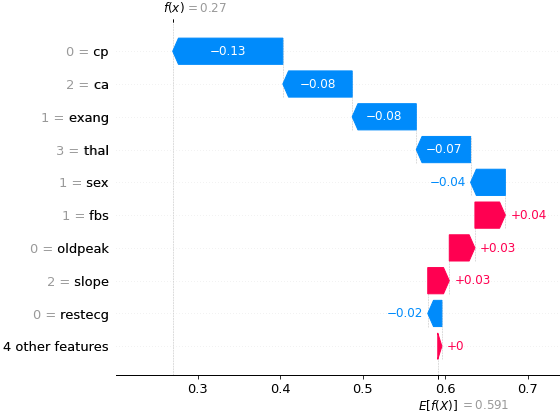


SHAP produces an aestheically pleasing plot, but let's unpack a bit what all of it means. First, let's look at the $f(x)$ terms:

- $f(x) = 0.27$, at the top of the plot: this is our model's prediction for the first test set example. This means that our autoML model gives this patient a 27\% chance of having heart disease.
- $E[f(x)] = 0.591$, at the bottom of the plot: this is the *average* prediction of our model on the test set.

Remember from the slides how we talked about the **marginal contribution** of a feature as its importance? Here, we make it more concrete in that the Shapley value tells us how a particular feature makes our model deviate from the **average** prediction, $E[f(x)]$. 

What's neat about Shapley values is that since they are computed over all combinations of features, the sum of the Shapley values for each individual feature plus $E[f(x)]$ will exactly equal the prediction the model makes for the example! 

**Exercise:** Convince yourself that the sum of the Shapley values plus the average prediction equals the percentage chance of the prediction.

Now, we can look at the features themselves. For this example, it appears that the feature "cp = 0" has the biggest influence on the model output, as it reduces the model's prediction probability by **0.13**, followed by "ca = 2" and "exang = 1" which both reduce the model's prediction probability by **0.08**.

Let's take a look at the [dataset description](https://www.kaggle.com/cherngs/heart-disease-cleveland-uci) again for what the top few features mean:

- cp: chest pain type
  - Value 0: typical angina
  - Value 1: atypical angina
  - Value 2: non-anginal pain
  - Value 3: asymptomatic
- ca: number of major vessels (0-3) colored by flouroscopy
- exang: exercise induced angina (1 = yes; 0 = no)

This suggests that that "cp = 0," according to our model, reduces the probability of heart disease. We aren't doctors, so we need domain expertise to determine whether this is sensible or not. "Angina" is constriction of blood vessels in the heart, which doesn't sound ideal, but according to domain experts, "typical" angina (cp = 0) is preferable in patients with heart problems as opposed "atypical" angina (cp = 1). "Typical" angina is predictable (triggered by stress and exercise) and responds to treatment, which are both signals that the condition affecting the patient may not be an underlying heart disease.

We can also look at how "ca" aligns with medical knowledge. A flouroscopy is a test that checks the blockages of major blood vessels: more vessels colored means there are less blockages, so higher values mean lower risk for heart disease. The patient has a value of "ca = 2," which is the second highest possible value, and the SHAP value appropriately indicates that this lowers the predicted risk for heart disease. 

## Caution: be wary of over-interpreting!

Although these explanations of the model outputs seem intuitive, recall the "layers" of the data science process: these SHAP values are only interpreting the model, and do not directly represent the **world** or even the **data** wholly. These SHAP values do give us some confidence that our model is learning patterns that align with real-world relationships between the features and heart disease, but we should not treat them as ground truth.

![](https://christophm.github.io/interpretable-ml-book/images/big-picture.png)

## Global feature importance

We've looked at the Shapley values that shows how important features are for a single example, but what if we want to say something about **global** feature importance? SHAP also provides a convenient function to do so:

In [ ]:
shap.plots.bar(shap_values)

Now, we're taking the **mean** of the **absolute value** of the Shapley value over the test set, which gives an approximation of how "important" a feature is.
Here we see again that the "cp" feature is not only the most important feature for the test example we looked at, but also the most important feature for our model overall.

Note however that since we take the absolute value here, these aggregated feature importances do not tell us the **direction** of the relationship, ie whether a feature increases or decreases the predicted risk for heart disease. So again, be wary of how we assign meaning to these values.

# Part 2 References

- https://github.com/slundberg/shap
- https://github.com/automl/auto-sklearn-talks/blob/main/2021_07_28_EuroPython/Tutorial-Regression.ipynb
- https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Front%20page%20example%20(XGBoost).html

---
# Summary

*Estimated timing of tutorial: 65 minutes*

- In this tutorial, we were introduced to auto-ml through auto-sklearn, which, in very few lines of code, we are able to produce black-box classifiers or regressions that have the potential to produce good predictions of our data.
- We prepared our data for use in the auto-sklearn coding library
- We gave a limited amount of time for auto-sklearn to choose the best model for fitting a classifier to our data
- We also visualized the prediction performance of our classifier by looking at accuracy scores and making a confusion matrix
- We thought about the limitations of using this black-box method and use Shapley values from the SHAP package to interpret our classifier model. 
- Using the SHAP package and domain knowledge about the dataset we made best-guesses as to how our independent variables contribute to the model prediction.


## Submit
Take the weekly survey/quiz and also submit your notebooks there. (Click the ?D logo below!)

<a href="https://airtable.com/shrVfGvG2mYCBhZS4"><img src="https://github.com/KordingLab/ENGR344/blob/master/tutorials/static_344/SubmitButton.jpg?raw=1" alt="button link to survey" style="width:410px"></a>